# **Lab 1 - de Machine Learning y Deep Learning**

## 1. Análisis preliminar del problema

Para el dataset seleccionado (https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression?resource=download):

a. Determine si se trata de un problema de clasificación o regresión.
Justifique su respuesta e indique claramente el target (variable
objetivo).

b. Clasifique las características en tipos de variables (numéricas,
categóricas, binarias, ordinales, etc.).

c. Investigue y explique el protocolo de adquisición y/o generación de
datos que siguieron los investigadores.

a. Es un problema de clasificación ya que lo que se quiere estimar es si una persona desarrolló un enfermedad cardiáca, lo cual se da cómo 0 = No, 1 = Sí

b. 
Numéricas continuas
- age (edad en años).
- cigsPerDay (número de cigarrillos diarios).
- totChol (colesterol total).
- sysBP (presión sistólica).
- diaBP (presión diastólica).
- BMI (índice de masa corporal).
- heartRate (frecuencia cardíaca).
- glucose (glucosa en sangre).

Categóricas ordinales
- education (nivel educativo codificado 1–4).

Categóricas Binarias (0 = No, 1 = Sí)
- male (sexo: hombre/mujer).
- currentSmoker (fumador actual).
- BPMeds (medicación para la presión arterial).
- prevalentStroke (historia de ACV).
- prevalentHyp (hipertensión prevalente).
- diabetes (diabetes diagnosticada).
- TenYearCHD (target).

C. 

**Bibliografía**
- https://www.heart.org/en/news/2018/10/10/framingham-the-study-and-the-town-that-changed-the-health-of-a-generation
- https://www.sciencedirect.com/science/article/pii/S0735109721010962
- https://www.nhlbi.nih.gov/science/framingham-heart-study-fhs
- https://www.framinghamheartstudy.org/fhs-about/

## 2. Análisis exploratorio de datos (EDA)

Realice un EDA completo sobre el dataset:

- Distribuciones de las variables.

- Estadísticos descriptivos.

- Correlaciones entre variables.

- Relación entre variables predictoras y el target.

Cada gráfico o estadística debe ir acompañado de una
interpretación detallada, en la cual explique qué información
aporta al problema de ML.

Utilice librerías como pandas, numpy, matplotlib y seaborn.

Conclusión
- Las gráficas obtenidas nos muestran que aunque una persona haya tenido un enfermedad coronaria, no se puede atribuir a una sola variable específica.
- Por el contrario, nos da a entender que una paciente con enfermedad coronaria debe presentar diferentes patologías 
- No se logra evidenciar relación entre las diferentes variables 


In [2]:
# Importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from tensorflow import keras


In [3]:
# Cargar dataset

heart_disease_prediction_df = pd.read_csv("framingham.csv")
heart_disease_prediction_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart_disease_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
heart_disease_prediction_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
heart_disease_prediction_df.describe(include = "all")

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
heart_disease_prediction_df.shape # Tamaño de la tabla

(4238, 16)

In [8]:
heart_disease_prediction_df.dtypes # Tipos de datos

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

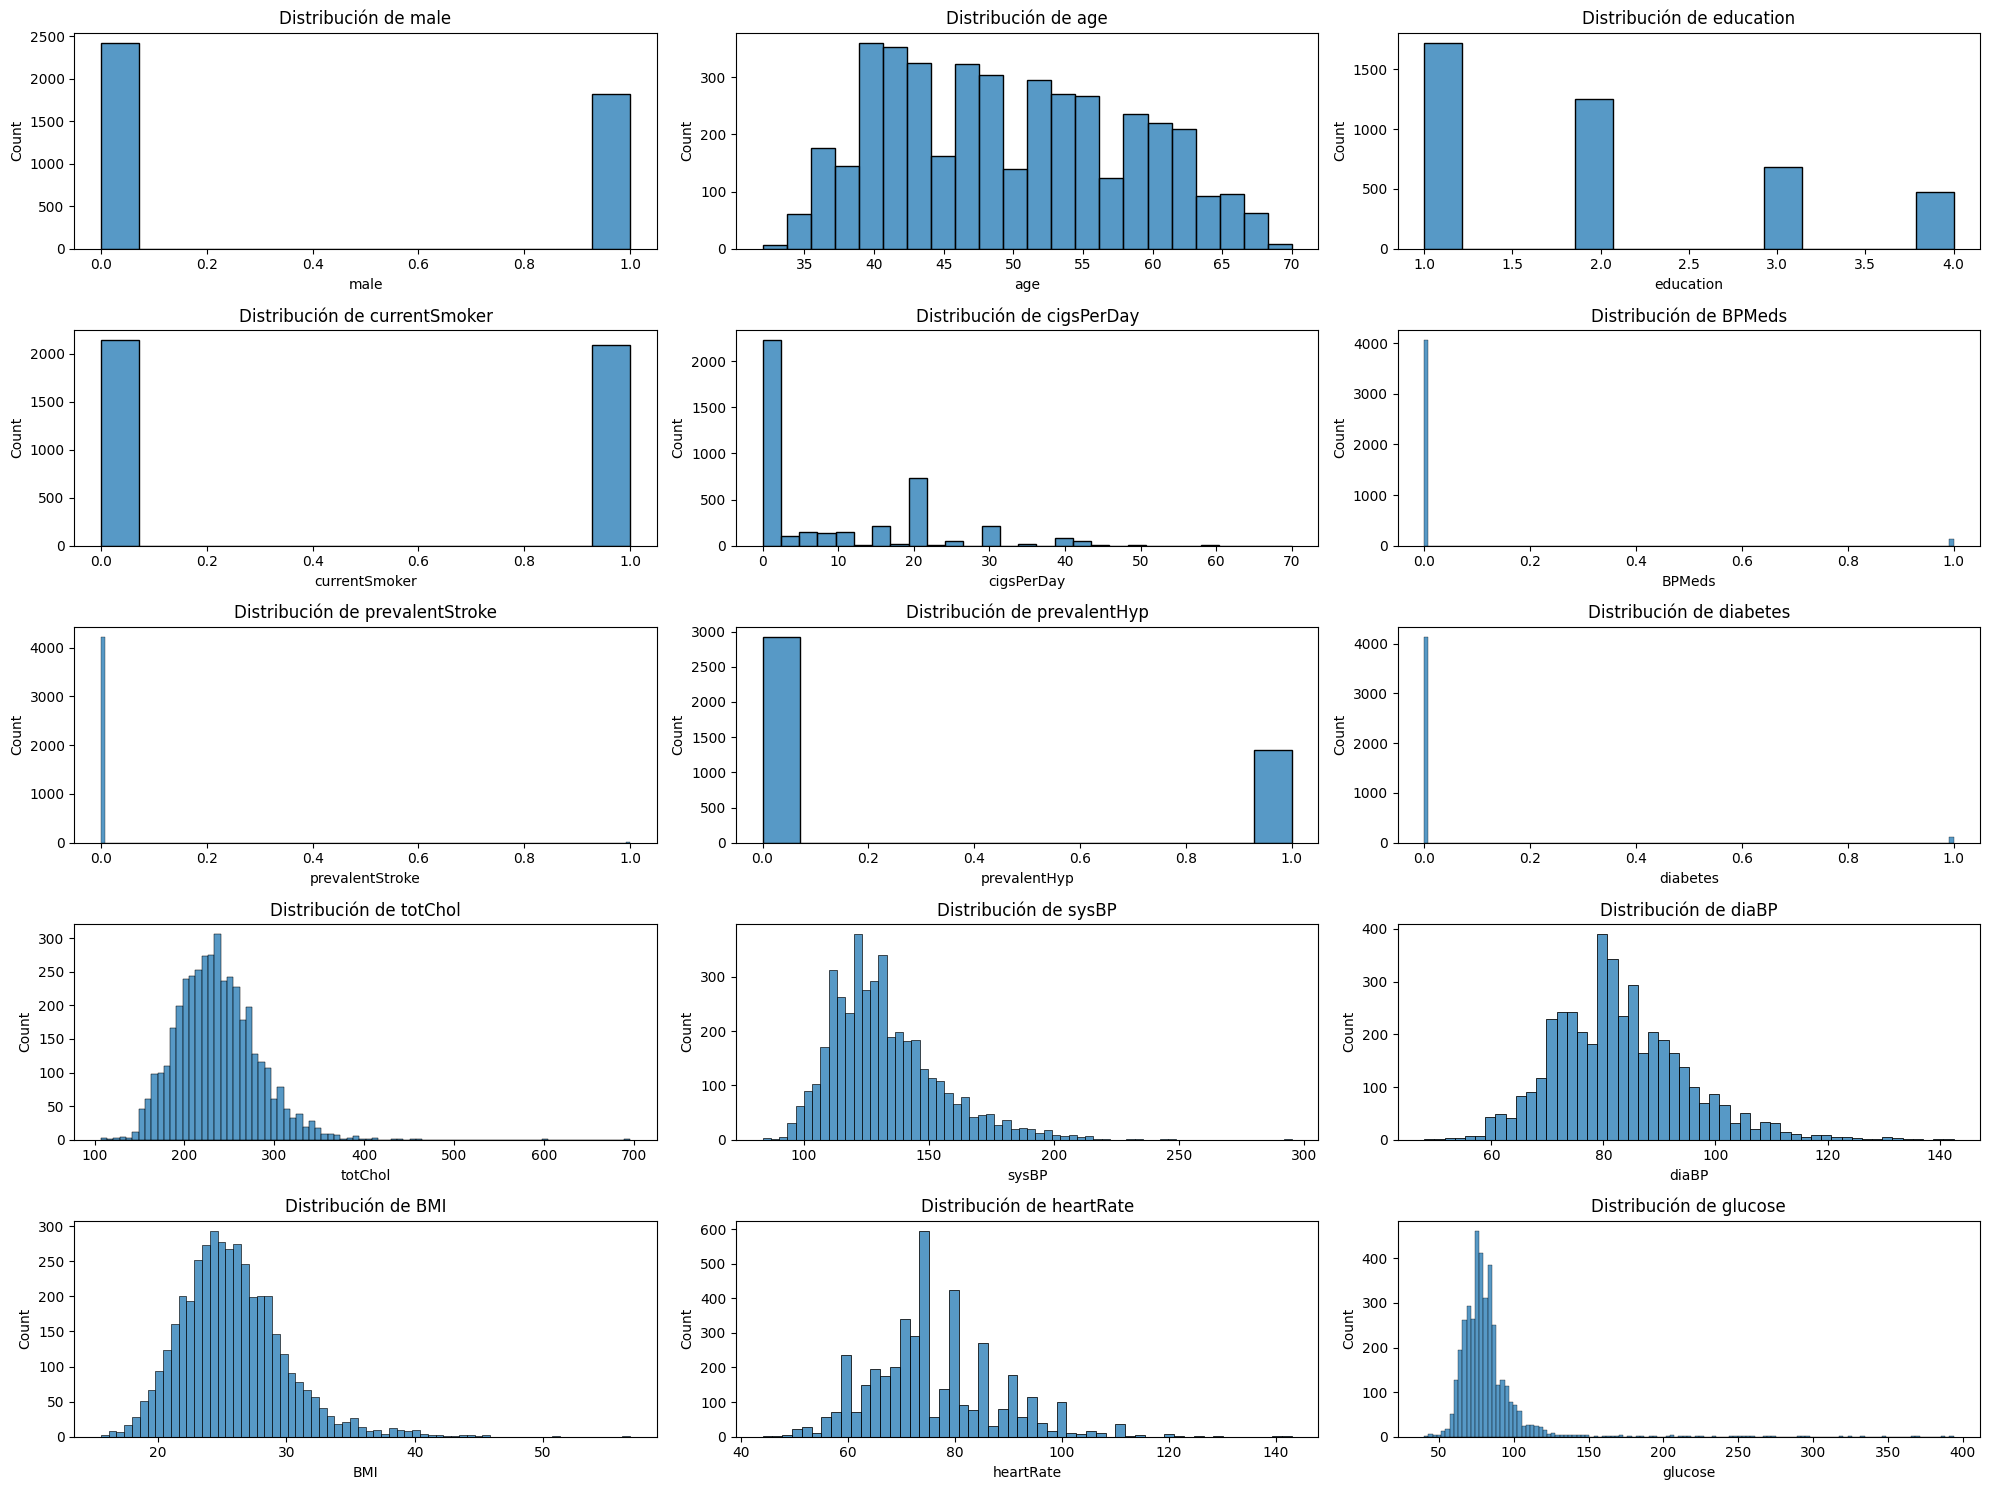

In [9]:
# Gráfico de distribucíon histográfica de cada variable (columna)
plt.figure(figsize=(20, 15))
for i, col in enumerate(heart_disease_prediction_df.columns.drop("TenYearCHD"), 1): # enumarate para establecer indice a cada columna e iniciar desde 1 en lugar de 0
    plt.subplot(len(heart_disease_prediction_df.columns.drop("TenYearCHD"))//3, 3, i) # Dividir la gráfica (nrows, ncols, index)
    sns.histplot(heart_disease_prediction_df[col])
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()

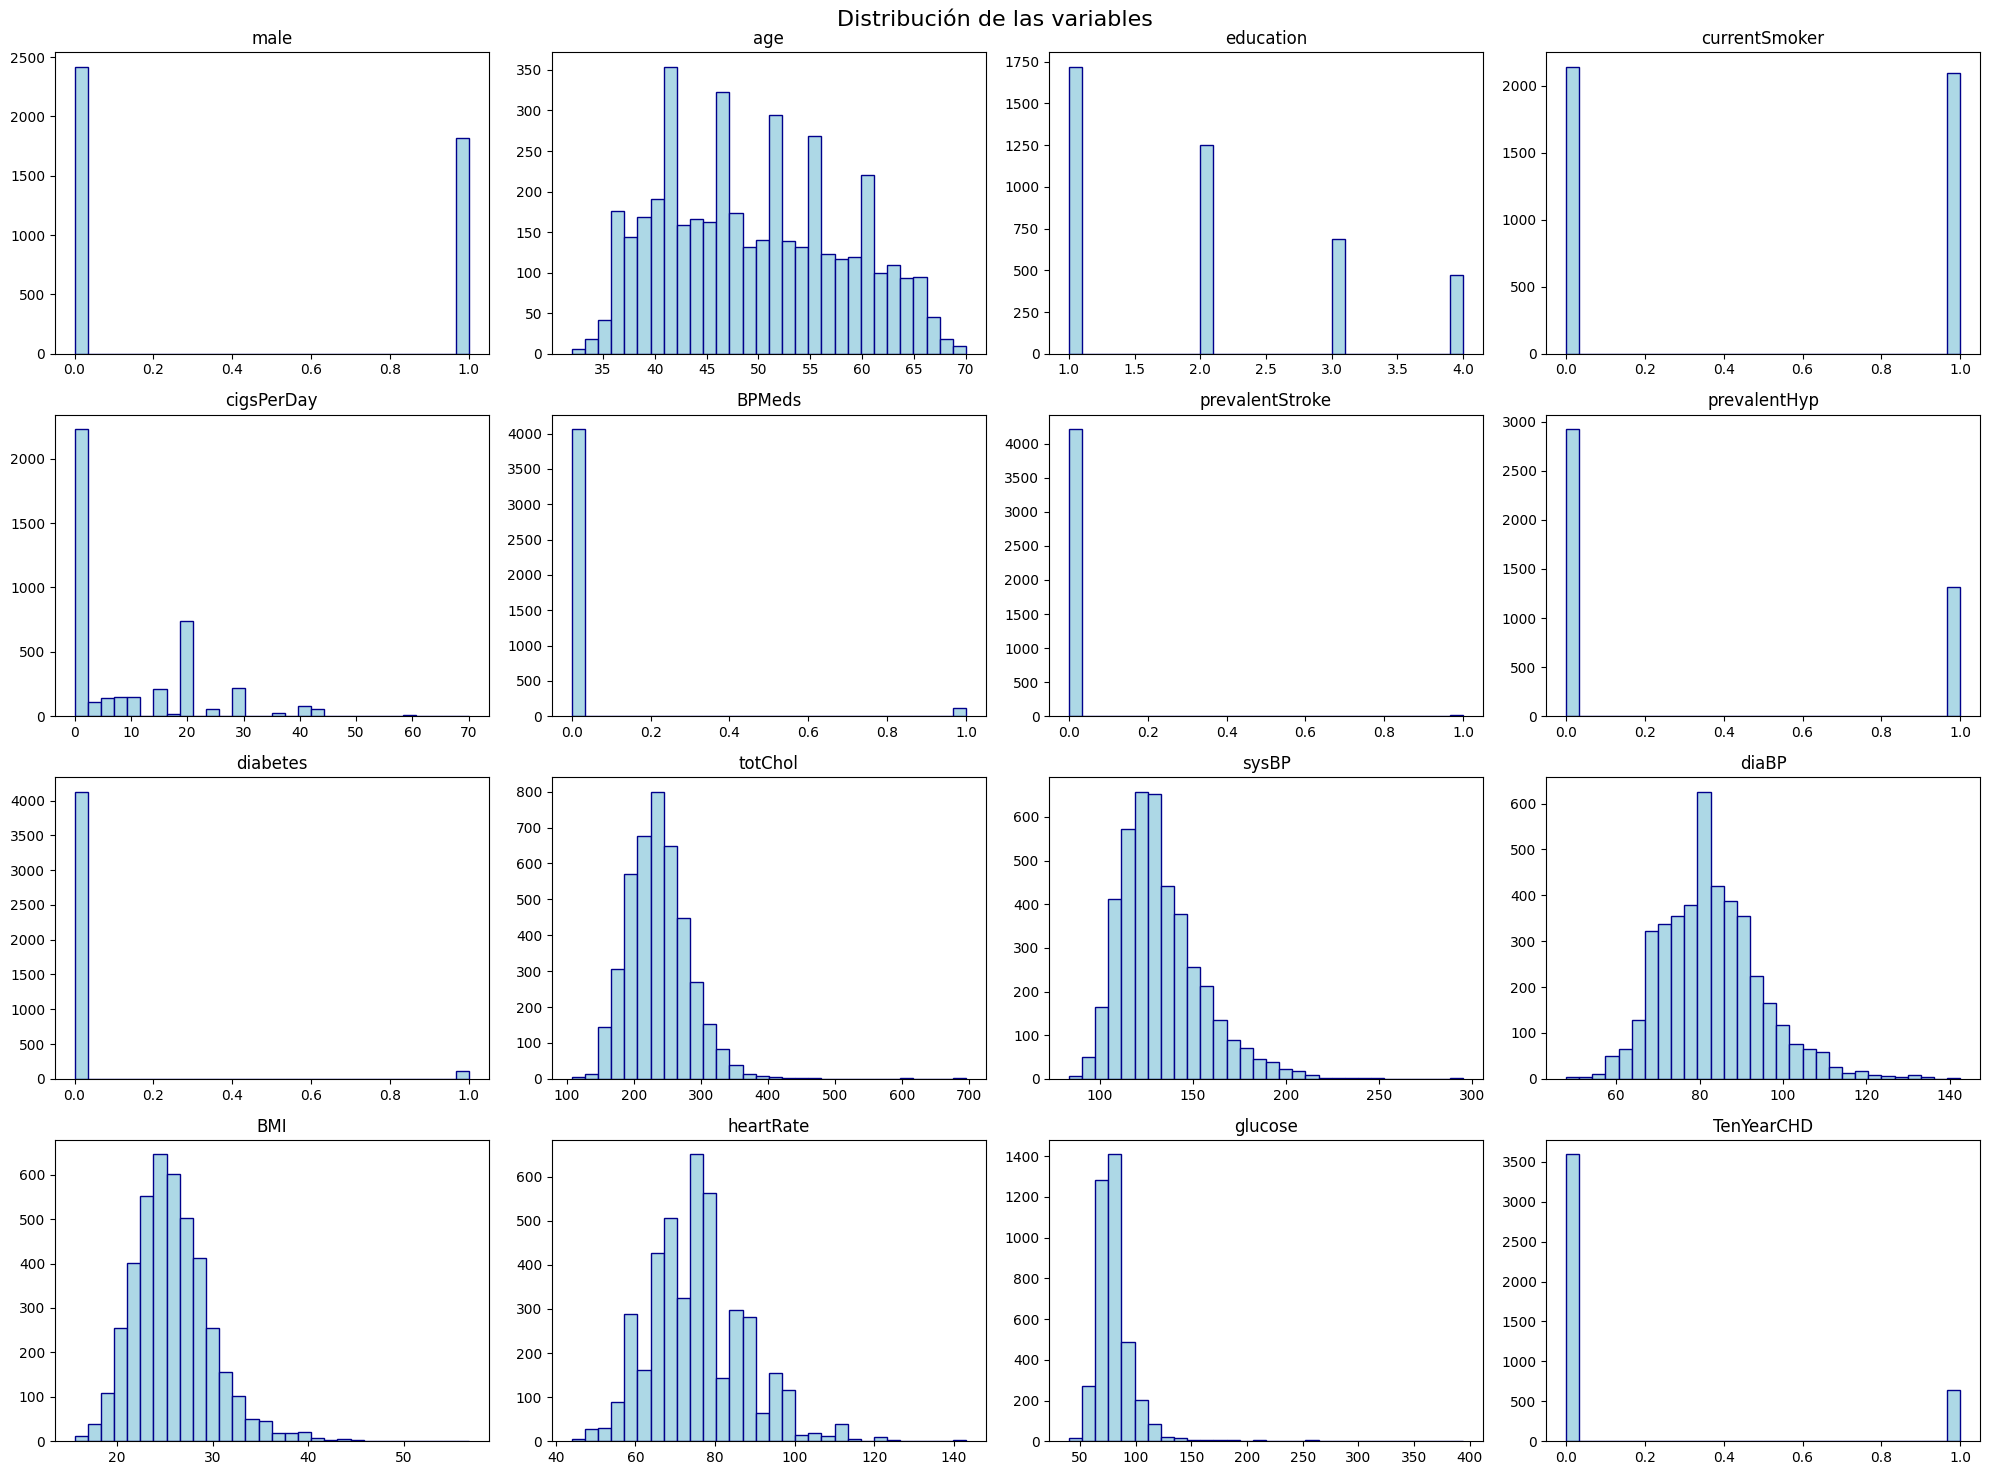

In [10]:
heart_disease_prediction_df.hist(
    figsize=(20, 15),
    bins=30,
    color = 'lightblue',
    edgecolor='darkblue',
    grid = False)
plt.suptitle("Distribución de las variables", fontsize=16)
plt.tight_layout()
plt.show()

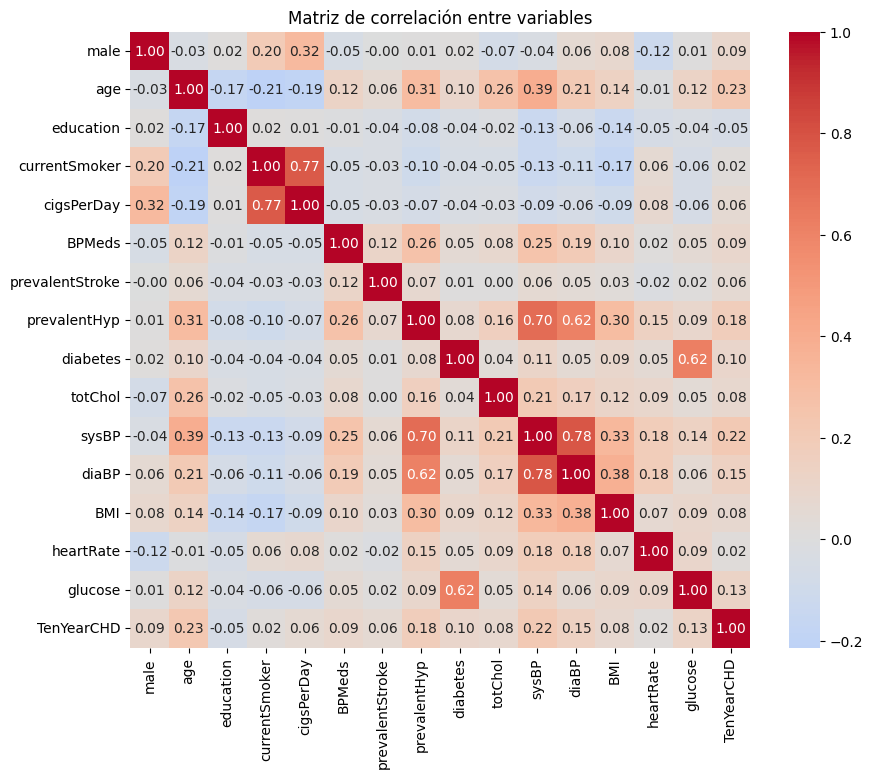

In [11]:
corr_matrix = heart_disease_prediction_df.corr() # Calcular matriz de correlación del dataset (pandas usa pearson)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.show()

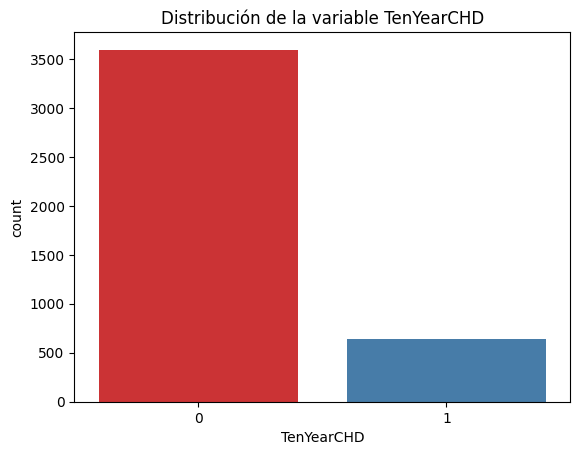

In [12]:
# Distribución del target
sns.countplot(data=heart_disease_prediction_df,
              x='TenYearCHD',
              hue='TenYearCHD',
              palette="Set1",
              legend=False)
plt.title("Distribución de la variable TenYearCHD")
plt.show()

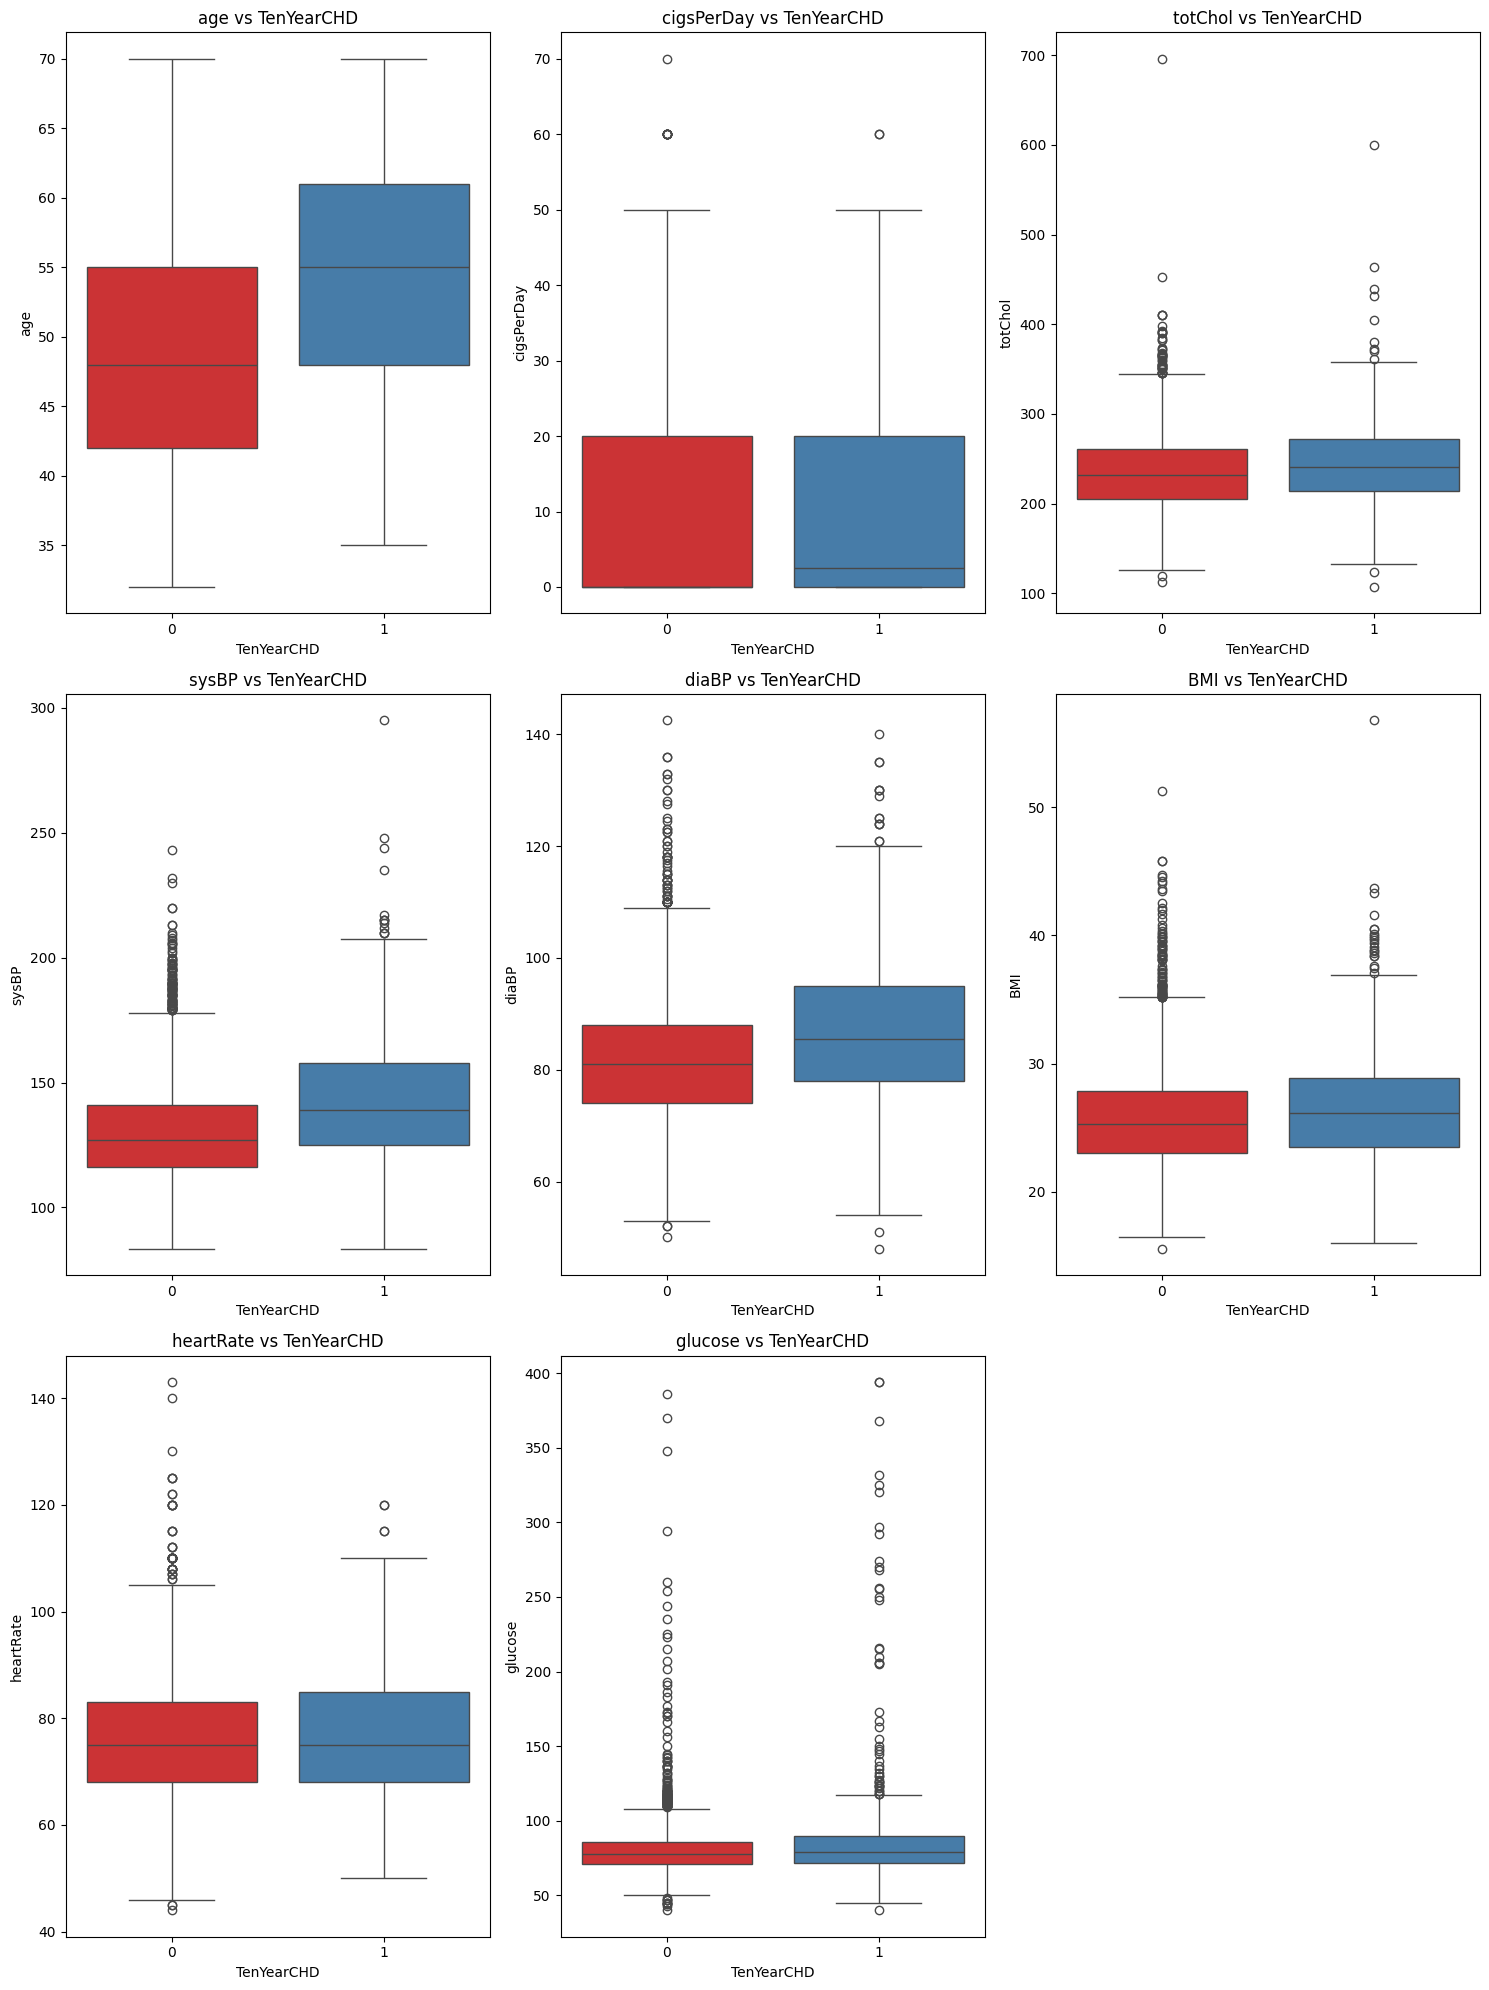

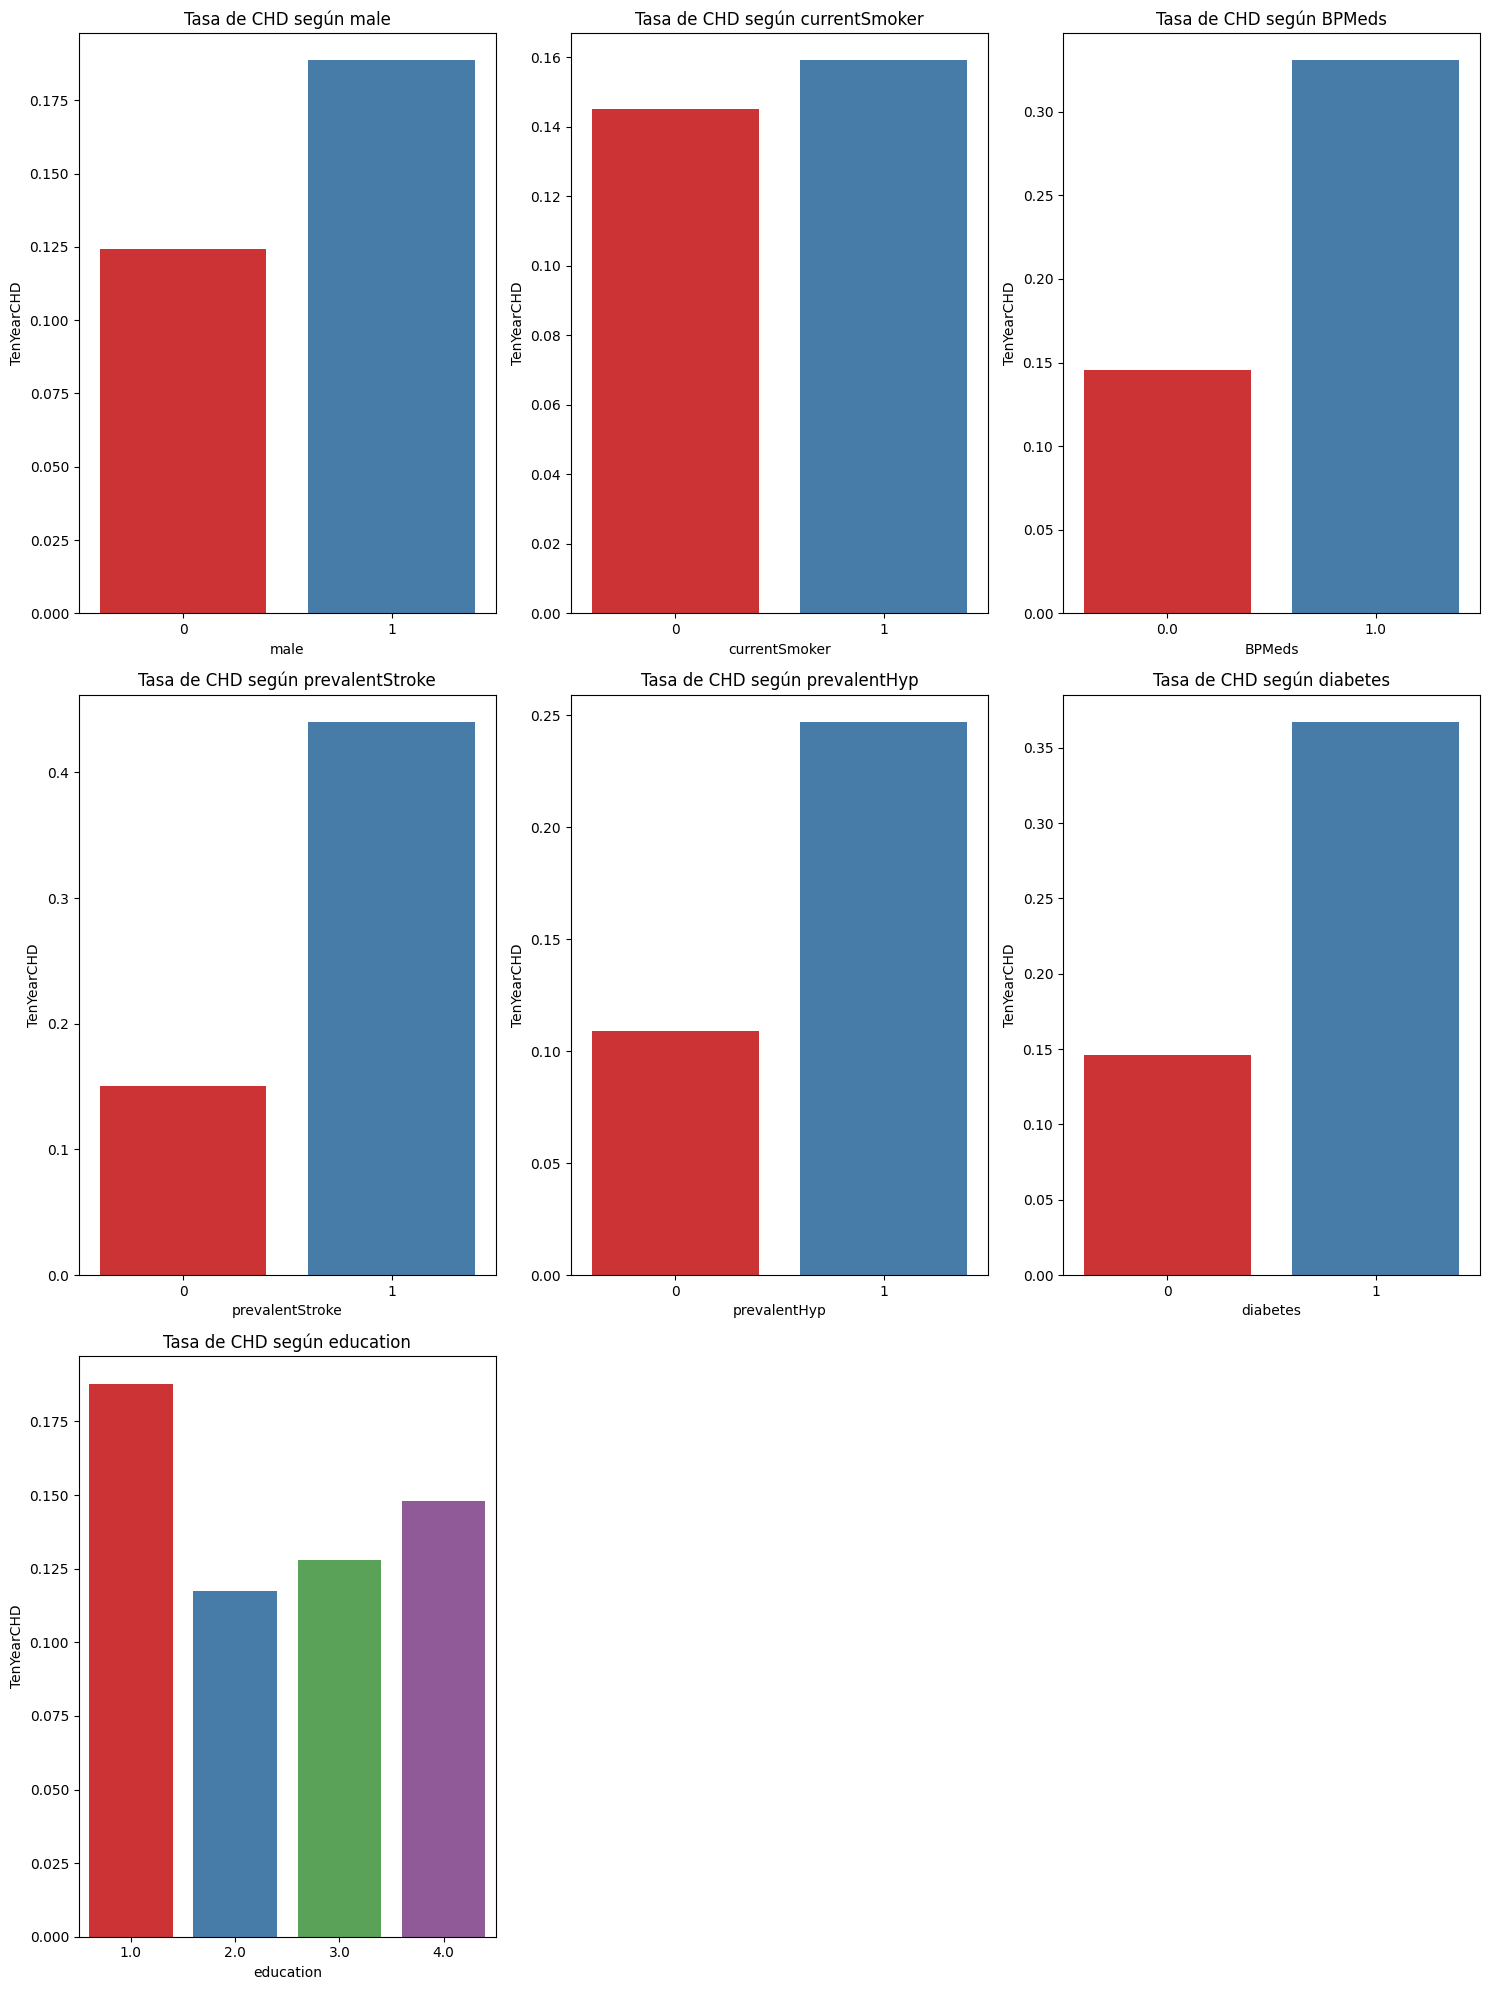

In [13]:
# Agrupar variables categóricas/binarias y variables numéricas

# Lista de columnas numéricas (enteras y flotantes) excluyendo nuestro target
num_cols = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

# Lista de columnas categóricas o binarias excluyendo nuestro target (Manual)
cat_cols = ["male", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "education"]

# Variables Numéricas vs Target (boxplots)
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.boxplot(
        x="TenYearCHD", 
        y=col, 
        data=heart_disease_prediction_df, 
        hue="TenYearCHD", palette = 'Set1',
        legend = False)
    plt.title(f"{col} vs TenYearCHD")
plt.tight_layout()
plt.show()

# Variables Categóricas/Binarias vs Target (barplots)
plt.figure(figsize=(15, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols)//3 + 1, 3, i)
    sns.barplot(
        x=col, 
        y="TenYearCHD", 
        data=heart_disease_prediction_df, 
        hue=col, palette = 'Set1',
        legend = False,
        errorbar=None)
    plt.title(f"Tasa de CHD según {col}")
plt.tight_layout()
plt.show()

## 3. Procesamiento de datos
Aplique buenas prácticas de procesamiento y limpieza de datos:
- Manejo de valores nulos.

- Codificación de variables categóricas.

- Normalización o estandarización si aplica.

- Reducción de dimensionalidad si se justifica.

Implemente un pipeline de procesamiento con scikit-learn.
Divida los datos en X_train, X_val y X_test con proporciones
justificadas (ej. 70/15/15).


In [14]:
heart_disease_prediction_df.isna().sum() # Cantidad de valores NaN en cada columna

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [15]:
heart_disease_prediction_df.dropna(axis=0, how='any', inplace=True) # Eliminar (drop) las filas (axis) que contengan al menos un valor NaN (how) y sin cambiar de dataset (inplace)

In [16]:
heart_disease_prediction_df.isna().sum() # Cantidad de valores NaN después de limpiar

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
heart_disease_prediction_df.shape # Tamaño de la tabla después de limpiar

(3656, 16)

In [18]:
# Normalizar y Prepara los datos

numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
    ]
)

processing_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
])

In [19]:
# Dividir los datos

X = heart_disease_prediction_df.drop("TenYearCHD", axis=1)
y = heart_disease_prediction_df["TenYearCHD"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [20]:
# Aplicar pipeline de preprocesamiento
X_train_proc = processing_pipeline.fit_transform(X_train)
X_val_proc = processing_pipeline.transform(X_val)
X_test_proc = processing_pipeline.transform(X_test)

## 4. Entrenamiento de modelos

a. Entrene y evalúe al menos 3 modelos distintos sobre su dataset:

- k-Nearest Neighbors (kNN).

- Modelo de ensamble (Random Forest o GradientBoosting).

- Deep Neural Network (DNN) (mínimo 3 capas ocultas, con funciones de activación y regularización).

Muestre los resultados en una tabla comparativa generada en Python, donde se evidencie el desempeño de cada modelo en:
X_train, X_val y X_test.

b. Responda:

- ¿Cuál modelo tuvo mejor desempeño?
R: DNN obtuvo mejor desempeño. EL accurancy en los tres grupos de datos (Val, Train, Test) es consistente. Además, es el modelo con mejor accuracy en el grupo de datos Test

- ¿Alguno presentó overfitting o underfitting? ¿Cómo lo
detectó?
R: Random forest presentó overfitting ya que su accuracy en Train fue de 0.9, sin embargo, su accuracy en Test fue de solo 0.84 mostrando que perdió capacidad para aplicar el modelo en un grupo de datos generalizado

- ¿Cuál seleccionaría para producción y por qué?
R: DNN sería el elegido ya que fue el que obtuvo mejor desempeño

In [21]:
# Modelo 1: kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_proc, y_train)

# Evaluar modelo
acc_knn_train = accuracy_score(y_train, knn.predict(X_train_proc))
acc_knn_val   = accuracy_score(y_val, knn.predict(X_val_proc))
acc_knn_test  = accuracy_score(y_test, knn.predict(X_test_proc))

In [22]:
# Modelo 2 a: Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train_proc, y_train)

# Evaluar modelo
acc_rf_train = accuracy_score(y_train, rf.predict(X_train_proc))
acc_rf_val   = accuracy_score(y_val, rf.predict(X_val_proc))
acc_rf_test  = accuracy_score(y_test, rf.predict(X_test_proc))

In [23]:
# Modelo 2 b: Gradient Boostin
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train_proc, y_train)

# Evaluar modelo
acc_gb_train = accuracy_score(y_train, gb.predict(X_train_proc))
acc_gb_val   = accuracy_score(y_val, gb.predict(X_val_proc))
acc_gb_test  = accuracy_score(y_test, gb.predict(X_test_proc))

In [24]:
# Modelo 3: DNN
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train_proc.shape[1],), activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(32, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.002)),
    keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.01))  # salida binaria
])

C:\Users\TUF\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Descripción del modelo:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,681 (61.25 KB)

 Trainable params: 15,681 (61.25 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compilar el Modelo
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [27]:
# Entrenar el modelo
history = model.fit(
    X_train_proc, y_train,
    validation_data=(X_val_proc, y_val),
    epochs=50, batch_size=32, verbose=1
)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8327 - loss: 0.7236 - val_accuracy: 0.8485 - val_loss: 0.6772
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8476 - loss: 0.6485 - val_accuracy: 0.8485 - val_loss: 0.6235
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8476 - loss: 0.6087 - val_accuracy: 0.8485 - val_loss: 0.5898
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8480 - loss: 0.5784 - val_accuracy: 0.8485 - val_loss: 0.5634
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8484 - loss: 0.5547 - val_accuracy: 0.8485 - val_loss: 0.5432
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8484 - loss: 0.5375 - val_accuracy: 0.8485 - val_loss: 0.5346
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8480 - loss: 0.5203 - val_accuracy: 0.8485 - val_loss: 0.5170
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8488 - loss: 0.5077 - val_accuracy: 0.8504 - val_loss

In [28]:
# Evaluar Modelo
acc_dnn_train = model.evaluate(X_train_proc, y_train, verbose=0)[1]
acc_dnn_val   = model.evaluate(X_val_proc, y_val, verbose=0)[1]
acc_dnn_test  = model.evaluate(X_test_proc, y_test, verbose=0)[1]

In [29]:
results = pd.DataFrame({
    "Modelo": ["kNN", "Random Forest", "Gradient Boosting", "Deep Neural Network"],
    "Train Accuracy": [acc_knn_train, acc_rf_train, acc_gb_train, acc_dnn_train],
    "Val Accuracy":   [acc_knn_val, acc_rf_val, acc_gb_val, acc_dnn_val],
    "Test Accuracy":  [acc_knn_test, acc_rf_test, acc_gb_test, acc_dnn_test]
})

print("\nResultados comparativos:")
display(results.round(4))


Resultados comparativos:


,Modelo,Train Accuracy,Val Accuracy,Test Accuracy
0,kNN,0.8667,0.8412,0.8452
1,Random Forest,0.9011,0.8485,0.8525
2,Gradient Boosting,0.8972,0.8522,0.8452
3,Deep Neural Network,0.8484,0.8504,0.8579


## 5. Prueba con muestra artificial

Genere una muestra artificial (nueva) con características inventadas, ingrésela al modelo seleccionado y analice la predicción

Explique:

- ¿El resultado tiene sentido?
R: Sí, ya que en la base de datos original, la mayoría de pacientes no presentó una enfermedad coronaria a pesar de las patalogías

¿Qué pasaría si modificara una o más variables de la muestra?
R: Dependiendo de la variable que se modifique debería subir o bajar, sin embargo, como se interpretó anteriormente, la enfermedad coronaria no depende de una variable, si no de multiples variables

In [ ]:
# Crear muestra

muestra = pd.DataFrame([{
    "male": 1,                # Hombre
    "age": 55,                # Edad
    "education": 2,           # Nivel educativo
    "currentSmoker": 1,       # Fumador actual
    "cigsPerDay": 15,         # Cigarrillos por día
    "BPMeds": 1,              # No usa medicamentos para la presión
    "prevalentStroke": 0,     # No tuvo ACV
    "prevalentHyp": 1,        # Hipertensión
    "diabetes": 0,            # No diabético
    "totChol": 250,           # Colesterol total
    "sysBP": 150,             # Presión sistólica
    "diaBP": 95,              # Presión diastólica
    "BMI": 30.5,              # Índice de masa corporal
    "heartRate": 80,          # Frecuencia cardíaca
    "glucose": 110            # Glucosa
}])

In [40]:
# Preparar la muestra con el pipeline

muestra_proc = processing_pipeline.transform(muestra)

In [ ]:
# Aplicar el modelo escogido (DNN)

prediction_prob = model.predict(muestra_proc)[0][0]
prediction_class = int(prediction_prob > 0.5)

print(f"Probabilidad estimada de enfermedad coronaria a 10 años: {prediction_prob:.4f}")
print(f"Predicción final (0 = No CHD, 1 = CHD): {prediction_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Probabilidad estimada de enfermedad coronaria a 10 años: 0.3629
Predicción final (0 = No CHD, 1 = CHD): 0


## 6. Investigue y explique las siguientes estrategias:

- K-Fold Cross Validation.
R:
- Se divide el dataset en K particiones o “folds” de tamaño similar.

- El modelo se entrena K veces, cada vez usando K-1 folds para entrenamiento y el fold restante para validación.

- Se promedian las métricas obtenidas en cada iteración para estimar el desempeño general del mode

- Leave-One-Out Cross Validation (LOOCV).
R: 

- Es un caso K-Fold donde K = N (cada fold contiene un solo ejemplo).

- Se entrena el modelo N veces, cada vez dejando un único registro para validación y el resto para entrenamiento.

- Al final, se promedian todas las métricas.

Responda:
¿Son aplicables estas estrategias al dataset elegido?
R: K-Fold sí se podría usar determinando un K adecuado (+5), por el contrario, Leave-One-Out implicaría un gran costo de entrenamiento debido al tamaño de las muestras

¿Qué beneficios tendrían frente al esquema de validación
tradicional (train/val/test)?
R: Permiten usar todos los datos para entrenamiento


